# **The Problem: Automatic Apparent Age Estimation**

Summary:
1. Base network
2. Bias mitigation strategies
- Data augmentation
- Custom loss
3. Network created from scratch

From the first to the third part of this file, we present the best network and strategies we found. However, the best results we had were obtained by changing some of the initial code. Therefore, we sometimes included in the comments some example of the experiments we did (such as training other built-in networks) to show our work. Some results of those experiments can be found in the report.

The last part is dedicated to the network we build ourselves. The results weren't as good as a built-in network, but it seemed important to include this as well.



---
# **1. Base network**
---

In [ ]:
import tensorflow as tf

# downloading the data
!wget http://data.chalearnlap.cvc.uab.cat/Colab_2021/app_data_with-no-test-labels.zip

# decompressing the data
from zipfile import ZipFile

with ZipFile('app_data_with-no-test-labels.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

# removing the .zip file after extraction to clean space
!rm app_data.zip

--2023-11-29 19:56:47--  http://data.chalearnlap.cvc.uab.cat/Colab_2021/app_data_with-no-test-labels.zip
Resolving data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)... 158.109.8.102
Connecting to data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)|158.109.8.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803085698 (766M) [application/zip]
Saving to: ‘app_data_with-no-test-labels.zip’

app_data_with-no-te 100%[===================>] 765.88M  5.15MB/s    in 2m 19s  

2023-11-29 19:59:07 (5.51 MB/s) - ‘app_data_with-no-test-labels.zip’ saved [803085698/803085698]

Data decompressed successfully
rm: cannot remove 'app_data.zip': No such file or directory


In [ ]:
import numpy as np

# loading the train data (with labels)
X_train = np.load('./data/data_train.npy')
Y_train = np.load('./data/labels_train.npy')
M_train = np.load('./data/meta_data_train.npy')

# loading the validation data (with labels)
X_valid = np.load('./data/data_valid.npy')
Y_valid = np.load('./data/labels_valid.npy')
M_valid = np.load('./data/meta_data_valid.npy')

# loading the test data (images only) to be used later in our challenge
X_test = np.load('./data/data_test.npy')


# train labels are real numbers, ranging from ~0.9 to ~89 (years old);
# we will re-scale the labels to [0,1] by using a normalization factor of 100,
# assuming there is no sample with age > 100.
Y_train = Y_train/100
Y_valid = Y_valid/100
# Y_test = Y_test/100 # -> we don't normalize the test labels as we will evaluate
                      # them using the raw data, i.e., the apparent age values

print('Train data size and shape', X_train.shape)
print('Train labels size and shape', Y_train.shape)
print('Train metadata size and shape', M_train.shape)
print('----')
print('Valid data size and shape', X_valid.shape)
print('Valid labels size and shape', Y_valid.shape)
print('Valid metadata size and shape', M_valid.shape)
print('----')
print('Test data size and shape', X_test.shape)

Train data size and shape (4065, 224, 224, 3)
Train labels size and shape (4065,)
Train metadata size and shape (4065, 3)
----
Valid data size and shape (1482, 224, 224, 3)
Valid labels size and shape (1482,)
Valid metadata size and shape (1482, 3)
----
Test data size and shape (1978, 224, 224, 3)




Our final network being ResNet50, the preprocessing stays the same. However, when training other built-in network, we needed to use other preprocessing functions, such as *tf.keras.applications.xception.preprocess_input* for the network Xception, or *tf.keras.applications.vgg16.preprocess_input* for VGG16.

In [ ]:
# train
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# test
for i in range(0,X_test.shape[0]):
  x = X_test[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_test[i,] = tf.keras.applications.resnet50.preprocess_input(x)


In [ ]:
# downloading the data
!wget http://data.chalearnlap.cvc.uab.cat/Colab_2021/model.zip

# decompressing the data
with ZipFile('model.zip','r') as zip:
   zip.extractall()
   print('Model decompressed successfully')

# removing the .zip file after extraction  to clean space
!rm model.zip

--2022-10-06 12:57:53--  http://data.chalearnlap.cvc.uab.cat/Colab_2021/model.zip
Resolving data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)... 158.109.8.102
Connecting to data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)|158.109.8.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107893665 (103M) [application/zip]
Saving to: ‘model.zip’

model.zip           100%[===================>] 102.89M   611KB/s    in 3m 32s  

2022-10-06 13:01:27 (497 KB/s) - ‘model.zip’ saved [107893665/107893665]

Model decompressed successfully



After several tests on with other models, we chose to stay with the ResNet50 model. However, we did not change a lot from the initial model. Therefore, we have included part of our code (commented) at the end of each cell that was used to train other built-in models from Keras. The example here is using the Xception network, but we trained a lot more, such as VGG16, other models in the ResNet and EfficientNet family, etc...



In [ ]:
import h5py
import numpy as np
import tensorflow as tf

# loading the pretrained model
model = tf.keras.models.load_model('./model/weights.h5')

# code used to load another model (Xception example)
#model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)


We have included some of our code at the end of the following cell, the same way as before, to show the use of other models.

In [ ]:
# Using the FC layer before the 'classifier_low_dim' layer as feature vector
fc_512 = model.get_layer('dim_proj').output

# adding a dropout layer to minimize overfiting problems
dp_layer = tf.keras.layers.Dropout(0.5)(fc_512)

# adding a few hidden FC layers to learn hidden representations
fc_256 = tf.keras.layers.Dense(256, activation='relu', name='f_256')(fc_512)
fc_128 = tf.keras.layers.Dense(128, activation='relu', name='f_128')(fc_256)
fc_64 = tf.keras.layers.Dense(64, activation='relu', name='f_64')(fc_128)
fc_32 = tf.keras.layers.Dense(32, activation='relu', name='f_32')(fc_64)

# Includint an additional FC layer with sigmoid activation, used to regress
# the apparent age
output = tf.keras.layers.Dense(1, activation='sigmoid', name='predict')(fc_32)

# building and pringing the final model
model = tf.keras.models.Model(inputs=model.get_layer('base_input').output,outputs=output)


# Adapting the Xception model :

# fc_512 = model.get_layer('block14_sepconv2_act').output
# avg_layer = tf.keras.layers.Average(7)(fc_512)
# dp_layer = tf.keras.layers.Dropout(0.5)(avg_layer)
# fc_256 = tf.keras.layers.Dense(256, activation='relu', name='f_256')(fc_512)
# fc_128 = tf.keras.layers.Dense(128, activation='relu', name='f_128')(fc_256)
# output = tf.keras.layers.Dense(1, activation='sigmoid', name='predict')(fc_128)
# model = tf.keras.models.Model(inputs=model.get_layer('input_2').output,outputs=output)

# We also tried adding convolution, batch normalization and reLu layers on several models, but it had little to no effect.

Our results with data augmentation being better if we train the whole network, we set all layers to trainable.

In [ ]:
# setting all layers of the model to trainable
model.trainable = True

counter = 0
for layer in model.layers:
  print(counter, layer.name, layer.trainable)
  counter +=1

0 base_input True
1 conv1/7x7_s2 True
2 conv1/7x7_s2/bn True
3 activation_1 True
4 max_pooling2d_1 True
5 conv2_1_1x1_reduce True
6 conv2_1_1x1_reduce/bn True
7 activation_2 True
8 conv2_1_3x3 True
9 conv2_1_3x3/bn True
10 activation_3 True
11 conv2_1_1x1_increase True
12 conv2_1_1x1_proj True
13 conv2_1_1x1_increase/bn True
14 conv2_1_1x1_proj/bn True
15 add_1 True
16 activation_4 True
17 conv2_2_1x1_reduce True
18 conv2_2_1x1_reduce/bn True
19 activation_5 True
20 conv2_2_3x3 True
21 conv2_2_3x3/bn True
22 activation_6 True
23 conv2_2_1x1_increase True
24 conv2_2_1x1_increase/bn True
25 add_2 True
26 activation_7 True
27 conv2_3_1x1_reduce True
28 conv2_3_1x1_reduce/bn True
29 activation_8 True
30 conv2_3_3x3 True
31 conv2_3_3x3/bn True
32 activation_9 True
33 conv2_3_1x1_increase True
34 conv2_3_1x1_increase/bn True
35 add_3 True
36 activation_10 True
37 conv3_1_1x1_reduce True
38 conv3_1_1x1_reduce/bn True
39 activation_11 True
40 conv3_1_3x3 True
41 conv3_1_3x3/bn True
42 activati

We set a learning schedule to decrease the learning rate during the training. The schedule used here is obtained with an exponential decay.

Thanks to this learning schedule, we can learn more precise feature and have a smaller loss. The only disadvantage is regarding the training duration. If, despite the training patience, the training does not stop before the maximum number of epochs, which can be quite big, the final learning rate will be very small, and so will be the training speed. Thus, while we generally have better performances using such a training schedule, it can lead to networks taking a long time to train if we are not careful.

In [ ]:
import pickle

initial_learning_rate = 1e-3
final_learning_rate = 1e-7
batchSize = 32
numEpochs = 50
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/numEpochs)
steps_per_epoch = int(len(X_train)/batchSize)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)
#--------------------------
RESUME_TRAINING = False
RESUME_FROM_EPOCH = 20
#--------------------------
# loading the saved model (best model learned at stage 1)
if(RESUME_TRAINING == False):
  saved_model = model
else:
  # resume training (stage 2)
  saved_model = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage.h5')

# setting all layers to traineble
saved_model.trainable = True

#=================================================
# training all layers (2nd stage), given the model saved on stage 1
saved_model.compile(tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])
#=================================================

# defining the early stop criteria
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage.h5', monitor='val_loss', mode='min', save_best_only=True)

if(RESUME_TRAINING == False):
  history = saved_model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batchSize, epochs=numEpochs, initial_epoch=0, shuffle=True, verbose=1, callbacks=[es,mc])
else:
  history = saved_model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batchSize, epochs=numEpochs, initial_epoch=RESUME_FROM_EPOCH, shuffle=True, verbose=1, callbacks=[es,mc])
  # saving training history
with open('/content/drive/MyDrive/computerVisionProject_Maelys/train_history_2nd_stage.pkl', 'wb') as handle:
  pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)



Epoch 1/50
128/128 [==============================] - 48s 332ms/step - loss: 0.0360 - mae: 0.1161 - val_loss: 0.0385 - val_mae: 0.1130
Epoch 2/50
128/128 [==============================] - 41s 319ms/step - loss: 0.0343 - mae: 0.1138 - val_loss: 0.0302 - val_mae: 0.1122
Epoch 3/50
128/128 [==============================] - 39s 308ms/step - loss: 0.0300 - mae: 0.1136 - val_loss: 0.0320 - val_mae: 0.1144
Epoch 4/50
128/128 [==============================] - 41s 317ms/step - loss: 0.0278 - mae: 0.1132 - val_loss: 0.0254 - val_mae: 0.1132
Epoch 5/50
128/128 [==============================] - 41s 320ms/step - loss: 0.0255 - mae: 0.1131 - val_loss: 0.0255 - val_mae: 0.1139
Epoch 6/50
128/128 [==============================] - 41s 317ms/step - loss: 0.0266 - mae: 0.1132 - val_loss: 0.0253 - val_mae: 0.1131
Epoch 7/50
128/128 [==============================] - 40s 317ms/step - loss: 0.0244 - mae: 0.1130 - val_loss: 0.0237 - val_mae: 0.1148
Epoch 8/50
128/128 [==============================] - 4

Visualizing the train history


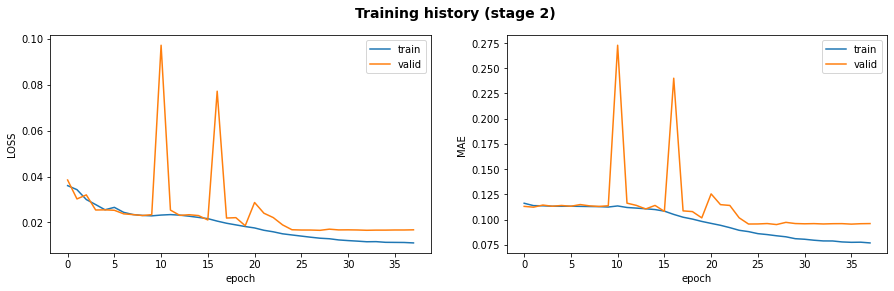

In [ ]:
from matplotlib import pyplot as plt

#loading the history of the model we defined and trained
train_hist = pickle.load(open("/content/drive/MyDrive/computerVisionProject_Maelys/train_history_2nd_stage.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history (stage 2)', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')


Loading the saved model and making predictions on the Validation set


In [ ]:
#--------------------------
ENABLE_EVALUATION_ST2 = True
#--------------------------

# loading the saved model
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage.h5')

if(ENABLE_EVALUATION_ST2==True):
  # predict on the validation data (normalized outputs)
  predictions_st2_valid = saved_model.predict(X_valid, batch_size=32, verbose=1)

  # re-scaling the predictions to the range of "age" as the outputs are in the range of [0,1]
  predictions_st2_valid_final = predictions_st2_valid*100

47/47 [==============================] - 4s 71ms/step


In [ ]:
if(ENABLE_EVALUATION_ST2==True):
  # evaluating on validation data (re-scalling Y_labels back to the range of "ages", using the normalization factor)
  error = []
  for i in range(0,len(Y_valid)):
    error.append(abs(np.subtract(predictions_st2_valid_final[i][0],Y_valid[i]*100)))

  print('MAE (validation) = %.8f' %(np.mean(error)))

  # printing some predictions (re-scaling back the values to the "age" range, using the normalization factor defined earlier)
  print('-----')
  for i in range(0,10):
    print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_valid_final[i], Y_valid[i]*100))

MAE (validation) = 9.50220687
-----
predicted age = 32.272 - Ground truth = 26.231
predicted age = 30.414 - Ground truth = 27.256
predicted age = 26.920 - Ground truth = 23.143
predicted age = 47.431 - Ground truth = 73.289
predicted age = 41.285 - Ground truth = 20.143
predicted age = 30.449 - Ground truth = 25.083
predicted age = 29.574 - Ground truth = 34.769
predicted age = 21.912 - Ground truth = 1.162
predicted age = 29.148 - Ground truth = 4.846
predicted age = 21.119 - Ground truth = 1.378


In [ ]:
import csv

if(ENABLE_EVALUATION_ST2==True):
  # predict on the validation data (normalized outputs)
  predictions_st2_test = saved_model.predict(X_test, batch_size=32, verbose=1)

  # re-scaling the predictions to the range of "age" as the outputs are in the range of [0,1]
  predictions_st2_test_final = predictions_st2_test*100

# saving the predictions as a csv file
with open('predictions.csv', 'w') as csvFile:
  writer = csv.writer(csvFile)
  writer.writerows(predictions_st2_test_final)
csvFile.close()

# compressing the csv file (to be submitted to codalab as prediction)
! zip predictions.zip predictions.csv

62/62 [==============================] - 5s 82ms/step
  adding: predictions.csv (deflated 56%)


# **2. Bias mitigation strategies**

- **Age bias** - group 1 : $age < 20$ , group 2 : $20 \leq age < 40$ , group 3 : $ 40 \leq age < 60$  ,  group 4 : $60 \leq age$
- **Gender bias** - group 1: *male*, group 2: *female*
- **Ethnicity bias** - group 1: *asian* , group 2: *afroamerican* , group 3: *caucasian*
- **Face expression bias** - group 1 : *neutral* , group 2 : *slightlyhappy* , group 3 : *happy* , group 4 : *other*


In [ ]:
def age_bias(predictions, gt):
  error_g1 = []
  error_g2 = []
  error_g3 = []
  error_g4 = []
  for i in range(0,len(gt)):
    if(gt[i]<20):
      error_g1.append(abs(predictions[i]-gt[i]))
    if(gt[i]>=20 and gt[i]<40):
      error_g2.append(abs(predictions[i]-gt[i]))
    if(gt[i]>=40 and gt[i]<60):
      error_g3.append(abs(predictions[i]-gt[i]))
    if(gt[i]>=60):
      error_g4.append(abs(predictions[i]-gt[i]))

  print('=============================')
  print('Age analysis:')
  print('Size group 1 = %d, MAE = %f' %(len(error_g1), np.mean(error_g1)))
  print('Size group 2 = %d, MAE = %f' %(len(error_g2), np.mean(error_g2)))
  print('Size group 3 = %d, MAE = %f' %(len(error_g3), np.mean(error_g3)))
  print('Size group 4 = %d, MAE = %f' %(len(error_g4), np.mean(error_g4)))

  age_bias = (abs(np.mean(error_g1)-np.mean(error_g2)) +
            abs(np.mean(error_g1)-np.mean(error_g3)) +
            abs(np.mean(error_g1)-np.mean(error_g4)) +
            abs(np.mean(error_g2)-np.mean(error_g3)) +
            abs(np.mean(error_g2)-np.mean(error_g4)) +
            abs(np.mean(error_g3)-np.mean(error_g4)))/6

  print('---------')
  print('Age bias (Ba) = ', age_bias)



def gender_bias(predictions, gt, metadata):
  error_m = []
  error_f = []
  for i in range(0,len(gt)):
    if(metadata[i][0] == 'female'):
      error_f.append(abs(predictions[i]-gt[i]))
    else:
      error_m.append(abs(predictions[i]-gt[i]))

  print('=============================')
  print('Gender analysis:')
  print('Size group female = %d, MAE = %f' %(len(error_f), np.mean(error_f)))
  print('Size group male = %d, MAE = %f' %(len(error_m), np.mean(error_m)))

  gender_bias = abs(np.mean(error_f)-np.mean(error_m))

  print('---------')
  print('Gender bias (Bg) = ', gender_bias)



def ethnicity_bias(predictions, gt, metadata):
  error_as = []
  error_af = []
  error_ca = []
  for i in range(0,len(gt)):
    if(metadata[i][1] == 'asian'):
      error_as.append(abs(predictions[i]-gt[i]))
    if(metadata[i][1] == 'afroamerican'):
      error_af.append(abs(predictions[i]-gt[i]))
    if(metadata[i][1] == 'caucasian'):
      error_ca.append(abs(predictions[i]-gt[i]))

  print('=============================')
  print('Ethnicity Analysis:')
  print('Size group asian = %d, MAE = %f' %(len(error_as), np.mean(error_as)))
  print('Size group afroamerican = %d, MAE = %f' %(len(error_af), np.mean(error_af)))
  print('Size group caucasian = %d, MAE = %f' %(len(error_ca), np.mean(error_ca)))

  ethnicity_bias = (abs(np.mean(error_as)-np.mean(error_af)) +
                   abs(np.mean(error_as)-np.mean(error_ca)) +
                   abs(np.mean(error_af)-np.mean(error_ca)))/3

  print('---------')
  print('Ethnicity bias (Be) = ', ethnicity_bias)



def face_expression_bias(predictions, gt, metadata):
  error_h = []
  error_s = []
  error_n = []
  error_o = []
  for i in range(0,len(gt)):
    if(metadata[i][2]=='happy'):
      error_h.append(abs(predictions[i]-gt[i]))
    if(metadata[i][2]=='slightlyhappy'):
      error_s.append(abs(predictions[i]-gt[i]))
    if(metadata[i][2]=='neutral'):
      error_n.append(abs(predictions[i]-gt[i]))
    if(metadata[i][2]=='other'):
      error_o.append(abs(predictions[i]-gt[i]))

  print('=============================')
  print('Face experession Analysis:')
  print('Size group happy = %d, MAE = %f' %(len(error_h), np.mean(error_h)))
  print('Size group slightlyhappy = %d, MAE = %f' %(len(error_s), np.mean(error_s)))
  print('Size group neutral = %d, MAE = %f' %(len(error_n), np.mean(error_n)))
  print('Size group other = %d, MAE = %f' %(len(error_o), np.mean(error_o)))

  face_bias = (abs(np.mean(error_h)-np.mean(error_s)) +
              abs(np.mean(error_h)-np.mean(error_n)) +
              abs(np.mean(error_h)-np.mean(error_o)) +
              abs(np.mean(error_s)-np.mean(error_n)) +
              abs(np.mean(error_s)-np.mean(error_o)) +
              abs(np.mean(error_n)-np.mean(error_o)))/6

  print('---------')
  print('Face Expression bias (Bf) = ', face_bias)




In [ ]:
if(ENABLE_EVALUATION_ST2==True):
  # computing the age bias (model_stage_2)
  age_bias(predictions_st2_valid_final,Y_valid*100)

  # computing the gender bias (model_stage_2)
  gender_bias(predictions_st2_valid_final,Y_valid*100,M_valid)

  # computing the ethnicity bias (model_stage_2)
  ethnicity_bias(predictions_st2_valid_final,Y_valid*100,M_valid)

  # computing the face bias (model_stage_2)
  face_expression_bias(predictions_st2_valid_final,Y_valid*100,M_valid)

Age analysis:
Size group 1 = 305, MAE = 14.748948
Size group 2 = 841, MAE = 5.551544
Size group 3 = 275, MAE = 13.463801
Size group 4 = 61, MAE = 19.876184
---------
Age bias (Ba) =  7.376511891682942
Gender analysis:
Size group female = 716, MAE = 9.344352
Size group male = 766, MAE = 9.649758
---------
Gender bias (Bg) =  0.30540657
Ethnicity Analysis:
Size group asian = 116, MAE = 7.442870
Size group afroamerican = 50, MAE = 9.527777
Size group caucasian = 1316, MAE = 9.682757
---------
Ethnicity bias (Be) =  1.4932584762573242
Face experession Analysis:
Size group happy = 403, MAE = 9.417423
Size group slightlyhappy = 476, MAE = 8.851404
Size group neutral = 492, MAE = 9.626518
Size group other = 111, MAE = 12.049850
---------
Face Expression bias (Bf) =  1.6340723037719727


# **a. Data augmentation**



## Visualizing the age and metadata distribution before augmentation

(array([1404.,    0.,    0., 1784.,    0.,    0.,  712.,    0.,    0.,
         165.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

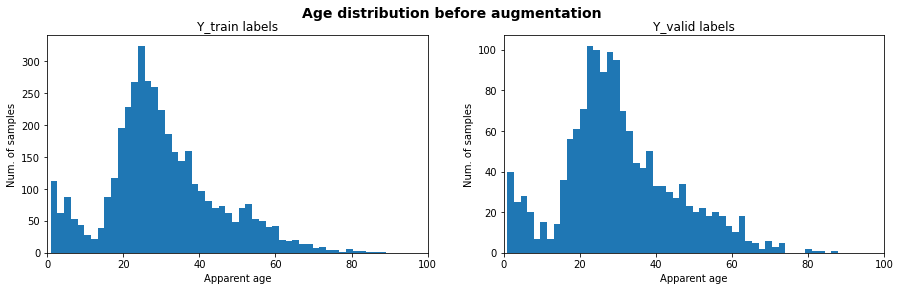

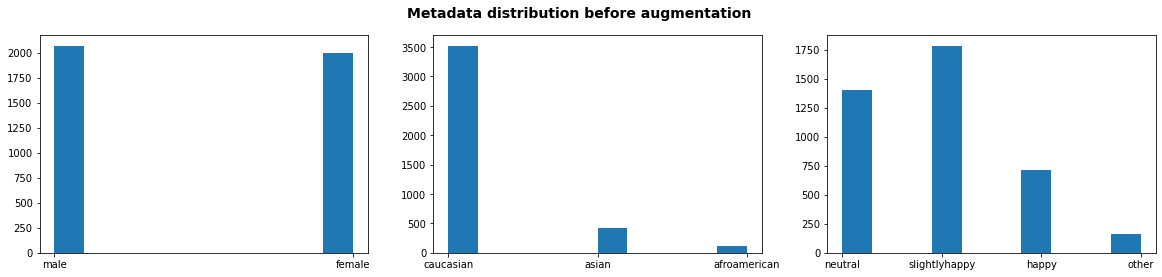

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution before augmentation', fontsize=14, fontweight='bold')

newYIndexes = np.where(np.isin(M_train[:,1],['asian']))[0]
# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 50)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 50)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

gender = []
etnhicity = []
emotion = []
for sample in M_train:
  gender.append(sample[0])
  etnhicity.append(sample[1])
  emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution before augmentation', fontsize=14, fontweight='bold')

ax1.hist(gender)
ax2.hist(etnhicity)
ax3.hist(emotion)


We augmente both the training set and the validation set.

After several experiments, we decided to focus on augmenting age and ethnicity data, mainly because augmenting the other categories did not give better results, and sometimes worsened the MAE and most of the bias.

We also did experiments to decide how we were going to augmente the data. For example, the babies, like old people, are under-represented in the data set. However, adding augmented images to the group worsened the bias, as people were now recognized as a lot younger than they actually were.

We tried several combination, looking at the histogram of the category to help decide which group to augmente. Here, we added four augmented images for each image corresponding to a person over 60 years old (flip, rotation, brightness, contrast). We then added two additional augmented images for those over 70 years old and those between 10 and 14 years old.

The six transformations were also applied to images corresponding to asians and african-americans.

In [ ]:
import cv2
from scipy.ndimage import rotate
from numpy import random
# aux variables
X_train_augmented = []
Y_train_augmented = []
M_train_augmented = []

# loading the train data and labels
X_train = np.load('./data/data_train.npy')
Y_train = np.load('./data/labels_train.npy')
Y_train = Y_train/100
M_train = np.load('./data/meta_data_train.npy')
print('Train set before augmentation = ', np.array(X_train).shape)

# augmenting the data
for i in range(0,len(X_train)):
  # check if image is in the group 'age >= 60'

  if (Y_train[i]*100 >= 60)  or (np.isin(M_train[i,1],['asian','afroamerican'])): # here labels are multiplied by 100 as they were normalized to be between [0,1]
    # flip
    X_train_augmented.append(cv2.flip(X_train[i], 1))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

    # rotate
    X_train_augmented.append(rotate(X_train[i], angle=20,reshape=False))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])
    X_train_augmented.append(rotate(X_train[i], angle=70,reshape=False))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])
    X_train_augmented.append(rotate(X_train[i], angle=130,reshape=False))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

    # changing brightness
    x_aux = cv2.cvtColor(X_train[i],cv2.COLOR_RGB2HSV)
    x_aux[:,:,2] = x_aux[:,:,2]*.5+np.random.uniform()
    X_train_augmented.append(cv2.cvtColor(x_aux,cv2.COLOR_HSV2RGB))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

    # changing contrast
    x_test = cv2.cvtColor(X_train[i],cv2.COLOR_RGB2BGR)
    lab = cv2.cvtColor(x_test, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(2,2))
    cl = clahe.apply(l_channel)
    limg = cv2.merge((cl,a,b))
    x_test = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    X_train_augmented.append(cv2.cvtColor(x_test, cv2.COLOR_BGR2RGB))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

  if (Y_train[i]*100 >= 70) or (Y_train[i]*100 <= 10 and Y_train[i]*100 >= 14)  or (np.isin(M_train[i,1],['asian','afroamerican'])):
    # blur
    X_train_augmented.append(cv2.GaussianBlur(X_train[i],(5,5),1.0))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

    # translation
    rows, cols ,c= X_train[i].shape
    M = np.float32([[1, 0, random.randint(-25, 25)], [0, 1, random.randint(-25, 25)]])
    X_train_augmented.append(cv2.warpAffine(X_train[i], M, (cols, rows)))
    Y_train_augmented.append(Y_train[i])
    M_train_augmented.append(M_train[i])

# adding the augmented images to the train set
X_train = np.concatenate((X_train, X_train_augmented))
Y_train = np.concatenate((Y_train, Y_train_augmented))
M_train = np.concatenate((M_train, M_train_augmented))
print('Train set after augmentation = ', np.array(X_train).shape)


# post-processing the train data with respect to ResNet-50 Inputs.
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

Train set before augmentation =  (4065, 224, 224, 3)
Train set after augmentation =  (9323, 224, 224, 3)


## Visualizing the age and metadata distribution after augmentation

(array([3406.,    0.,    0., 3920.,    0.,    0., 1610.,    0.,    0.,
         387.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

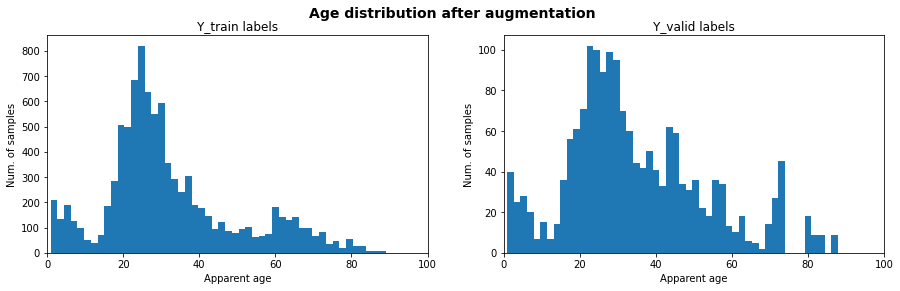

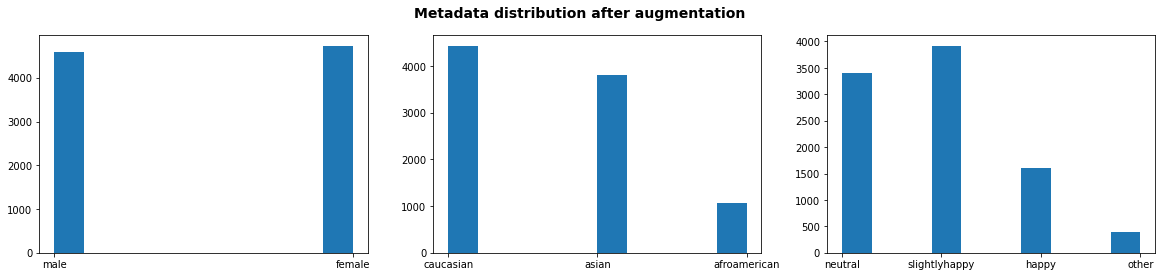

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution after augmentation', fontsize=14, fontweight='bold')

newYIndexes = np.where(np.isin(M_train[:,1],['asian']))[0]
# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 50)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 50)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

gender = []
etnhicity = []
emotion = []
for sample in M_train:
  gender.append(sample[0])
  etnhicity.append(sample[1])
  emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution after augmentation', fontsize=14, fontweight='bold')

ax1.hist(gender)
ax2.hist(etnhicity)
ax3.hist(emotion)


## Training the model using the augmented data

In [ ]:
import pickle

#--------------------------
RESUME_TRAINING = False
RESUME_FROM_EPOCH = 20
#--------------------------
# loading the saved model (best model learned at stage 1)
if(RESUME_TRAINING == False):
  saved_model = model
else:
  # resume training (stage 2)
  saved_model = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_augmentation.h5')


# setting all layers to traineble
saved_model.trainable = True

initial_learning_rate = 1e-4
final_learning_rate = 1e-7
batchSize = 32
numEpochs = 50
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/numEpochs)
steps_per_epoch = int(len(X_train)/batchSize)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)


# training all layers (2nd stage), given the model saved on stage 1
saved_model.compile(tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

# defining the early stop criteria
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# saving the best model (2nd stage) based on val_loss with a different name
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_augmentation.h5', monitor='val_loss', mode='min', save_best_only=True)


if(RESUME_TRAINING == False):
  history = saved_model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batchSize, epochs=numEpochs, shuffle=True, verbose=1, callbacks=[es,mc])
else:
  history = saved_model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batchSize, epochs=numEpochs, initial_epoch=RESUME_FROM_EPOCH, shuffle=True, verbose=1, callbacks=[es,mc])

with open('/content/drive/MyDrive/computerVisionProject_Maelys/train_history_2nd_stage.pkl', 'wb') as handle:
  pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/50
292/292 [==============================] - 117s 334ms/step - loss: 0.2082 - mae: 0.1299 - val_loss: 0.2097 - val_mae: 0.1448
Epoch 2/50
292/292 [==============================] - 95s 324ms/step - loss: 0.1834 - mae: 0.0714 - val_loss: 0.1844 - val_mae: 0.0854
Epoch 3/50
292/292 [==============================] - 95s 325ms/step - loss: 0.1728 - mae: 0.0533 - val_loss: 0.1759 - val_mae: 0.0801
Epoch 4/50
292/292 [==============================] - 95s 324ms/step - loss: 0.1639 - mae: 0.0411 - val_loss: 0.1675 - val_mae: 0.0760
Epoch 5/50
292/292 [==============================] - 95s 324ms/step - loss: 0.1562 - mae: 0.0352 - val_loss: 0.1628 - val_mae: 0.0821
Epoch 6/50
292/292 [==============================] - 95s 324ms/step - loss: 0.1489 - mae: 0.0308 - val_loss: 0.1540 - val_mae: 0.0769
Epoch 7/50
292/292 [==============================] - 95s 324ms/step - loss: 0.1423 - mae: 0.0292 - val_loss: 0.1480 - val_mae: 0.0760
Epoch 8/50
292/292 [==============================] - 

NameError: ignored

## Evaluating the model (with data augmentation)

In [ ]:
# loading the saved model
saved_model_2nd_augm = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_augmentation.h5')


#--------------------------
ENABLE_EVALUATION_ST2_AUGMENTED = True
#--------------------------

if(ENABLE_EVALUATION_ST2_AUGMENTED==True):
  # predict on the test data
  predictions_st2_augmented = saved_model_2nd_augm.predict(X_valid, batch_size=32, verbose=1)
  # re-scaling the output predictions (from [0,1] to age range) using the
  # the normalization factor mentioned before
  predictions_st2_augmented_final = predictions_st2_augmented*100


47/47 [==============================] - 5s 94ms/step


In [ ]:
import csv

if(ENABLE_EVALUATION_ST2_AUGMENTED==True):
  # evaluating on validation data
  error = []
  for i in range(0,len(Y_valid)):
    error.append(abs(np.subtract(predictions_st2_augmented_final[i][0],Y_valid[i]*100)))

  print('MAE (validation) = %.8f' %(np.mean(error)))

  # predict on the validation data (normalized outputs)
  predictions_st2_test = saved_model_2nd_augm.predict(X_test, batch_size=32, verbose=1)

  # re-scaling the predictions to the range of "age" as the outputs are in the range of [0,1]
  predictions_st2_test_final = predictions_st2_test*100

# saving the predictions as a csv file
with open('predictions.csv', 'w') as csvFile:
  writer = csv.writer(csvFile)
  writer.writerows(predictions_st2_test_final)
csvFile.close()

# compressing the csv file (to be submitted to codalab as prediction)
! zip predictions.zip predictions.csv

MAE (validation) = 6.24464211
62/62 [==============================] - 5s 82ms/step
updating: predictions.csv (deflated 55%)


In [ ]:
if(ENABLE_EVALUATION_ST2_AUGMENTED==True):
  # computing the age bias (model_stage_2) - with data augmentation
  age_bias(predictions_st2_augmented_final,Y_valid*100)

  # computing the gender bias (model_stage_2)
  gender_bias(predictions_st2_augmented_final,Y_valid*100,M_valid)

  # computing the ethnicity bias (model_stage_2)
  ethnicity_bias(predictions_st2_augmented_final,Y_valid*100,M_valid)

  # computing the face bias (model_stage_2)
  face_expression_bias(predictions_st2_augmented_final,Y_valid*100,M_valid)

Age analysis:
Size group 1 = 305, MAE = 7.086312
Size group 2 = 841, MAE = 4.874272
Size group 3 = 275, MAE = 8.307129
Size group 4 = 61, MAE = 11.631325
---------
Age bias (Ba) =  3.581995964050293
Gender analysis:
Size group female = 716, MAE = 6.209458
Size group male = 766, MAE = 6.277531
---------
Gender bias (Bg) =  0.068072796
Ethnicity Analysis:
Size group asian = 116, MAE = 5.402485
Size group afroamerican = 50, MAE = 5.172420
Size group caucasian = 1316, MAE = 6.359612
---------
Ethnicity bias (Be) =  0.7914616266886393
Face experession Analysis:
Size group happy = 403, MAE = 6.672400
Size group slightlyhappy = 476, MAE = 6.030605
Size group neutral = 492, MAE = 6.031218
Size group other = 111, MAE = 6.555453
---------
Face Expression bias (Bf) =  0.40826988220214844


# **b. Custom loss**

# Load the Train data again (to remove the augmented data) and generate the weigths
- First, we will generate a weight for each age group (for g =1 to 4);
- The formula used to calculate the weight for each group $j$ is:

  $w_j=n_{samples} / (n_{classes} * n_{samples,j}),$

  Where

    - $w_j$ is the weight for each group $j$,
    - $n_{samples}$ is the number of samples in the train set,
    - $n_{classes}$ is the number of classes (4 in our case, as we divided the ages in 4 groups),
    - $n_{samples,j}$ is the number of samples of class (group) $j$.


In [ ]:
# loading the train data again (original face images, before preprocessing):
X_train = np.load('./data/data_train.npy')
Y_train = np.load('./data/labels_train.npy')
Y_train = Y_train/100 # normalizing the age values to be between [0,1]

# preprocessing the train data with respect to ResNet-50 Inputs.
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# counting the number of samples per group in the train data (age attribute only)
g1 = g2 = g3 = g4 = 0
for i in range(0,Y_train.shape[0]):
    if(Y_train[i]*100<20):
      g1 +=1
    if(Y_train[i]*100>=20 and Y_train[i]*100<40):
      g2 +=1
    if(Y_train[i]*100>=40 and Y_train[i]*100<60):
      g3 +=1
    if(Y_train[i]*100>=60):
      g4 +=1
print('group(s) size = ', [g1, g2, g3, g4])

# generating the weights for each group using the equation defined above
w = sum(np.array([g1, g2, g3, g4]))/(4*np.array([g1, g2, g3, g4]))
print('weights per group = ', w)

# creating a vector with same size as Y_train, that will link a particular label to its weight
sample_weights = []
for i in range(0,Y_train.shape[0]):
    if(Y_train[i]*100<20):
      sample_weights.append(w[0])
    if(Y_train[i]*100>=20 and Y_train[i]*100<40):
      sample_weights.append(w[1])
    if(Y_train[i]*100>=40 and Y_train[i]*100<60):
      sample_weights.append(w[2])
    if(Y_train[i]*100>=60):
      sample_weights.append(w[3])
sample_weights = np.array(sample_weights)

group(s) size =  [796, 2389, 732, 148]
weights per group =  [1.27669598 0.42538719 1.38831967 6.86655405]


# I) Using the SAMPLE WEIGHTS to train our model and,
- Next, you will see the code we used to train our model (2nd stage) from the model we obtained at the 1st stage, using the customized loss option with sample weights.
- As default, the code will load the model already trained.
- You can change the boolean variable 'LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS' to False to train your model.
- Note, now we include other variables ('RESUME_TRAINING' and 'RESUME_FROM_EPOCH') to allow us resuming training, as well as to inform from what epoch we want to resume the trainind, detailed below.

# II) illustrating how to train + save + stop training + RESUME TRAINING
- **Imagine** you set 'LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS = False', 'NUM_EPOCHS = 12' and 'RESUME_TRAINING = False' to train your model the first time.
- Due to Colab limitations, your process stoped the training at the middle of epoch 10, and you saved the best model based on validation loss on epoch 9.
- In the above example, you can resume training from epoch 9 by setting the following parameters:
  - 'RESUME_TRAINING = True'
  - 'RESUME_FROM_EPOCH = 9'

- IMPORTANT: to resume training, you will need to monitor the epoch number where your model stopped before resuming the training, and change the defined variables properly.
  - Note that the fit function is adapted to receive the sample weights ('sample_weight=sample_weights').
  - Also note that the fit function changes if you are training from epoch 0 (initial_epoch=0) or resume training (initial_epoch=RESUME_FROM_EPOCH).
  - Finally, note that when you are resuming training, you load your 'best_model_2nd_stage_weighted.h5' instead of the model trained at stage 1 ('best_model.h5').


In [ ]:
#--------------------------
LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS = True
NUM_EPOCHS = 12
#--------------------------
RESUME_TRAINING = False
RESUME_FROM_EPOCH = 9
#--------------------------

if(LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS==True):
  # downloading the trained model
  !wget https://data.chalearnlap.cvc.uab.cat/Colab_2021/best_model_weighted.zip
  # decompressing the data
  with ZipFile('best_model_weighted.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')
  # removing the .zip file after extraction  to clean space
  !rm best_model_weighted.zip

else:
  # loading the saved model (best model learned at stage 1)
  if(RESUME_TRAINING == False):
    saved_model = tf.keras.models.load_model('best_model.h5') # load model from stage 1
  else:
    # resume training (stage 2)
    saved_model = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_weighted.h5')

  # setting all layers to traineble
  saved_model.trainable = True

  #=================================================
  # training all layers (2nd stage), given the model saved on stage 1
  saved_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])
  #=================================================

  # defining the early stop criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_weighted.h5', monitor='val_loss', mode='min', save_best_only=True)

  if(RESUME_TRAINING == False):
    history = saved_model.fit(X_train, Y_train, sample_weight=sample_weights, validation_data=(X_valid, Y_valid), batch_size=16, epochs=NUM_EPOCHS, initial_epoch=0, shuffle=True, verbose=1, callbacks=[es,mc])
  else:
    history = saved_model.fit(X_train, Y_train, sample_weight=sample_weights, validation_data=(X_valid, Y_valid), batch_size=16, epochs=NUM_EPOCHS, initial_epoch=RESUME_FROM_EPOCH, shuffle=True, verbose=1, callbacks=[es,mc])


--2022-09-06 09:19:43--  https://data.chalearnlap.cvc.uab.cat/Colab_2021/best_model_weighted.zip
Resolving data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)... 158.109.8.102
Connecting to data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)|158.109.8.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271396890 (259M) [application/zip]
Saving to: ‘best_model_weighted.zip’

best_model_weighted 100%[===================>] 258.82M  21.5MB/s    in 27s     

2022-09-06 09:20:11 (9.48 MB/s) - ‘best_model_weighted.zip’ saved [271396890/271396890]

Model decompressed successfully


# Making predictions on the Validation set and Evaluating
- Note that in this case, the model obtained MAE = 11.32504168, which is not the best score compared to the ones obtained before. However, are the evaluated biases better? Let's see!

In [ ]:
if(LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS==True):
  saved_model_2nd_weighted = tf.keras.models.load_model('best_model_2nd_stage_weighted.h5')
else:
  saved_model_2nd_weighted = tf.keras.models.load_model('/content/drive/MyDrive/computerVisionProject_Maelys/best_model_2nd_stage_weighted.h5')

#--------------------------
ENABLE_EVALUATION_WEIGHTED = True
#--------------------------

if(ENABLE_EVALUATION_WEIGHTED==True):
  # predict on the test data
  predictions_st2_weighted = saved_model_2nd_weighted.predict(X_valid, batch_size=32, verbose=1)
  # re-scaling the output predictions (from [0,1] to age range) using the
  # the normalization factor mentioned before
  predictions_st2_weighted_final = predictions_st2_weighted*100

47/47 [==============================] - 207s 4s/step


In [ ]:
if(ENABLE_EVALUATION_WEIGHTED==True):
  # evaluating on Validation data
  error = []
  for i in range(0,len(Y_valid)):
    error.append(abs(np.subtract(predictions_st2_weighted_final[i][0],Y_valid[i]*100)))

  print('MAE (Validation) = %.8f' %(np.mean(error)))

# printing some predictions
for i in range(0,20):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_weighted_final[i], Y_valid[i]*100))

MAE (Validation) = 11.32504168
predicted age = 21.446 - Ground truth = 26.231
predicted age = 47.882 - Ground truth = 27.256
predicted age = 21.450 - Ground truth = 23.143
predicted age = 41.488 - Ground truth = 73.289
predicted age = 18.906 - Ground truth = 20.143
predicted age = 17.529 - Ground truth = 25.083
predicted age = 44.479 - Ground truth = 34.769
predicted age = 12.614 - Ground truth = 1.162
predicted age = 41.278 - Ground truth = 4.846
predicted age = 0.000 - Ground truth = 1.378
predicted age = 20.264 - Ground truth = 29.897
predicted age = 18.607 - Ground truth = 44.000
predicted age = 42.518 - Ground truth = 27.187
predicted age = 27.191 - Ground truth = 33.611
predicted age = 34.087 - Ground truth = 1.167
predicted age = 45.582 - Ground truth = 49.533
predicted age = 4.016 - Ground truth = 2.436
predicted age = 51.050 - Ground truth = 53.385
predicted age = 30.119 - Ground truth = 51.625
predicted age = 38.005 - Ground truth = 28.478


# Comparing the 2nd stage of training:
case a) without augmentation and custom loss **VS.** case b) without augmentation but with custom loss.
- Age bias:
  - case a: 6.914151509602864
  - case b: 2.134239355723063
- Gender bias:
  - case a: 0.54991627
  - case b: 0.018253326
- Ethnicity bias:
  - case a: 1.5803696314493816
  - case b: 1.4811725616455078
- Face Expression bias:
  - case a: 0.7598605155944824
  - case b: 0.6052371660868326

As it can be observed, the model with custom loss and weighted samples obtained smaller bias scores on all evaluated attributes (on the validation set), even if the weigts were defined based on age attribute only. **The overal goal of the practical sessions is that you define a new strategy to increse accuracy (overall and per attribute) while minimizing bias**.

In [ ]:
if(ENABLE_EVALUATION_ST2==True and ENABLE_EVALUATION_WEIGHTED==True):
  age_bias(predictions_st2_valid_final,Y_valid*100)
  age_bias(predictions_st2_weighted_final,Y_valid*100)

  gender_bias(predictions_st2_valid_final,Y_valid*100,M_valid)
  gender_bias(predictions_st2_weighted_final,Y_valid*100,M_valid)

  ethnicity_bias(predictions_st2_valid_final,Y_valid*100,M_valid)
  ethnicity_bias(predictions_st2_weighted_final,Y_valid*100,M_valid)

  face_expression_bias(predictions_st2_valid_final,Y_valid*100,M_valid)
  face_expression_bias(predictions_st2_weighted_final,Y_valid*100,M_valid)

Age analysis:
Size group 1 = 305, MAE = 9.999447
Size group 2 = 841, MAE = 8.002157
Size group 3 = 275, MAE = 12.887999
Size group 4 = 61, MAE = 20.867607
---------
Age bias (Ba) =  6.914150238037109
Age analysis:
Size group 1 = 305, MAE = 11.057299
Size group 2 = 841, MAE = 11.096247
Size group 3 = 275, MAE = 11.461246
Size group 4 = 61, MAE = 15.204104
---------
Age bias (Ba) =  2.1342361768086753
Gender analysis:
Size group female = 716, MAE = 9.565139
Size group male = 766, MAE = 10.115053
---------
Gender bias (Bg) =  0.54991436
Gender analysis:
Size group female = 716, MAE = 11.334474
Size group male = 766, MAE = 11.316227
---------
Gender bias (Bg) =  0.01824665
Ethnicity Analysis:
Size group asian = 116, MAE = 9.278396
Size group afroamerican = 50, MAE = 7.614061
Size group caucasian = 1316, MAE = 9.984631
---------
Ethnicity bias (Be) =  1.5803794860839844
Ethnicity Analysis:
Size group asian = 116, MAE = 12.070345
Size group afroamerican = 50, MAE = 9.848596
Size group caucas

# Model built from scratch

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Activation, SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D, SpatialDropout2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint


age_model = Sequential()

age_model.add(SeparableConv2D(64, (3, 3), padding="same", input_shape = (224,224, 3), activation = "relu"))
age_model.add(MaxPooling2D(pool_size=(2, 2)))
age_model.add(BatchNormalization())

age_model.add(SeparableConv2D(128, (3, 3), padding="same", activation="relu"))
age_model.add(MaxPooling2D(pool_size=(2, 2)))
age_model.add(BatchNormalization())

age_model.add(SeparableConv2D(128, (3, 3), padding="same", activation = "relu"))
age_model.add(MaxPooling2D(pool_size=(2, 2)))
age_model.add(SpatialDropout2D(0.15))
age_model.add(BatchNormalization())

age_model.add(SeparableConv2D(256, (3, 3), padding="same", activation="relu"))
age_model.add(Activation("relu"))
age_model.add(MaxPooling2D(pool_size=(2, 2)))
age_model.add(SpatialDropout2D(0.15))
age_model.add(BatchNormalization())

age_model.add(SeparableConv2D(256, (3, 3), padding="same", activation = "relu"))
age_model.add(MaxPooling2D(pool_size=(2, 2)))
age_model.add(SpatialDropout2D(0.15))
age_model.add(BatchNormalization())

age_model.add(Flatten())

age_model.add(Dense(128, activation = "relu"))
age_model.add(Dropout(0.30))
age_model.add(BatchNormalization())

age_model.add(Dense(64, activation = "relu"))
age_model.add(Dropout(0.30))
age_model.add(BatchNormalization())

age_model.add(Dense(64, activation = "relu"))
age_model.add(Dropout(0.20))
age_model.add(BatchNormalization())

age_model.add(Dense(1, activation = "relu"))

age_model.summary()



age_model.compile(loss='mse', optimizer='adam', metrics=['mae'])


history = age_model.fit(X_train, Y_train, validation_data=(X_valid,Y_valid),epochs=30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 224, 224, 64)     283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 separable_conv2d_1 (Separab  (None, 112, 112, 128)    8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0

In [ ]:
# making predictions on the TEST data
predictions_age_model = age_model.predict(X_test, verbose=2)

print(predictions_age_model)

# re-scaling the predictions to the range of "ages" as the outputs are in the range of [0,1]
predictions_age_model_final = predictions_age_model*100

# evaluating on validation data (re-scalling Y_labels back to the range of "ages", using the normalization factor)
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions_age_model_final[i][0], Y_valid[i]*100)))

print('MAE (validation) = %.8f' %(np.mean(error)))

# printing some predictions (re-scaling back the values to the "age" range, using the normalization factor defined earlier)
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_model_final[i], Y_valid[i]*100))

if(True):
  age_bias(predictions_age_model_final,Y_valid*100)

  gender_bias(predictions_age_model_final,Y_valid*100,M_valid)

  ethnicity_bias(predictions_age_model_final,Y_valid*100,M_valid)

  face_expression_bias(predictions_age_model_final,Y_valid*100,M_valid)

62/62 - 3s - 3s/epoch - 46ms/step
[[0.24452399]
 [0.347035  ]
 [0.22338569]
 ...
 [0.22747537]
 [0.24594331]
 [0.24858856]]
MAE (validation) = 12.08346427
-----
predicted age = 24.452 - Ground truth = 26.231
predicted age = 34.703 - Ground truth = 27.256
predicted age = 22.339 - Ground truth = 23.143
predicted age = 29.169 - Ground truth = 73.289
predicted age = 24.875 - Ground truth = 20.143
predicted age = 23.695 - Ground truth = 25.083
predicted age = 33.632 - Ground truth = 34.769
predicted age = 34.323 - Ground truth = 1.162
predicted age = 28.940 - Ground truth = 4.846
predicted age = 34.419 - Ground truth = 1.378
Age analysis:
Size group 1 = 305, MAE = 16.001642
Size group 2 = 841, MAE = 5.845563
Size group 3 = 275, MAE = 20.823551
Size group 4 = 61, MAE = 39.091770
---------
Age bias (Ba) =  17.42675526936849
Gender analysis:
Size group female = 716, MAE = 10.425586
Size group male = 766, MAE = 13.633126
---------
Gender bias (Bg) =  3.2075405
Ethnicity Analysis:
Size group asi

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.clf()
figure = go.Figure()
figure.add_trace(go.Scatter(
                    y=history.history['mae'],
                    name='Train'))
figure.add_trace(go.Scatter( y=history.history['val_mae'], name='Validation'))
figure.update_layout(title='Train vs Val mean absolute error',xaxis_title='Epoch',yaxis_title='mae')
figure.show()

<Figure size 432x288 with 0 Axes>